In [1]:
# Required Python Machine learning Packages
import pandas as pd
import numpy as np
# For preprocessing the data
from sklearn.preprocessing import Imputer
from sklearn import preprocessing
# To split the dataset into train and test datasets
from sklearn.model_selection import train_test_split
# To model the Gaussian Navie Bayes classifier
from sklearn.naive_bayes import GaussianNB
# SVC
from sklearn.svm import SVC
# To calculate the accuracy score of the model
from sklearn.metrics import accuracy_score
# PLT
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('seaborn-whitegrid')

In [2]:
adult_df = pd.read_csv('adult.data',
                       header = None, delimiter=' *, *', engine='python')
adult_df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
                    'marital_status', 'occupation', 'relationship',
                    'race', 'sex', 'capital_gain', 'capital_loss',
                    'hours_per_week', 'native_country', 'income']

In [3]:
adult_df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

In [4]:
adult_df.shape

(32561, 15)

In [5]:
adult_df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
adult_df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [7]:
# No null value in dataset but might categorical vars have ? value
for value in ['workclass', 'education',
          'marital_status', 'occupation',
          'relationship','race', 'sex',
          'native_country', 'income']:
    print value,":", sum(adult_df[value] == '?')

workclass : 1836
education : 0
marital_status : 0
occupation : 1843
relationship : 0
race : 0
sex : 0
native_country : 583
income : 0


In [8]:
adult_df_rev = adult_df

In [9]:
adult_df_rev.describe(include='all')

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [10]:
# Impute missing values by replacing ? with Private value
for value in ['workclass', 'education',
          'marital_status', 'occupation',
          'relationship','race', 'sex',
          'native_country', 'income']:
    adult_df_rev[value].replace(['?'], [adult_df_rev.describe(include='all')[value][2]], inplace=True)

Text(0.5,0,'Age')

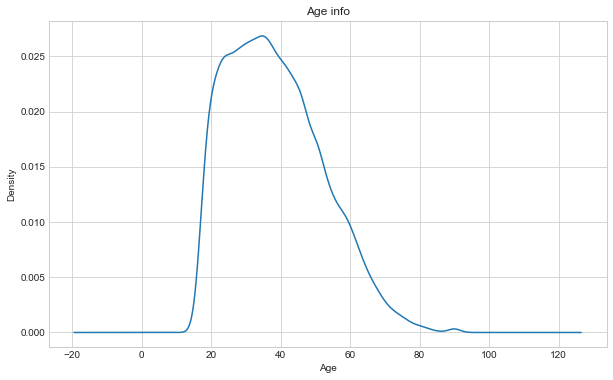

In [11]:
plt.rcParams['figure.figsize'] = (10, 6)
adult_df_rev['age'].plot(kind='density')
plt.title('Age info')                    
plt.xlabel('Age')

Text(0.5,0,'Workclass')

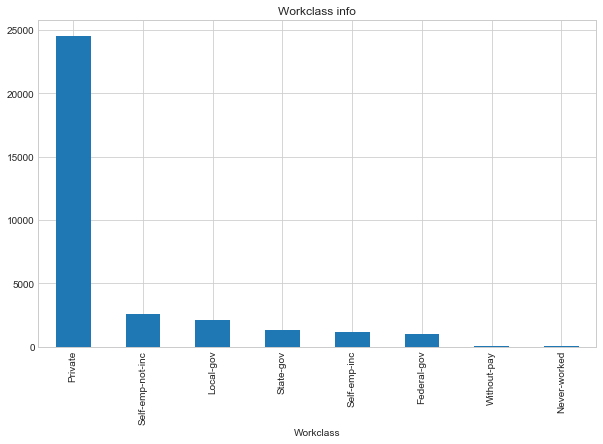

In [12]:
adult_df_rev['workclass'].value_counts().plot(kind='bar')
plt.title('Workclass info')                    
plt.xlabel('Workclass')

Text(0.5,0,'Education')

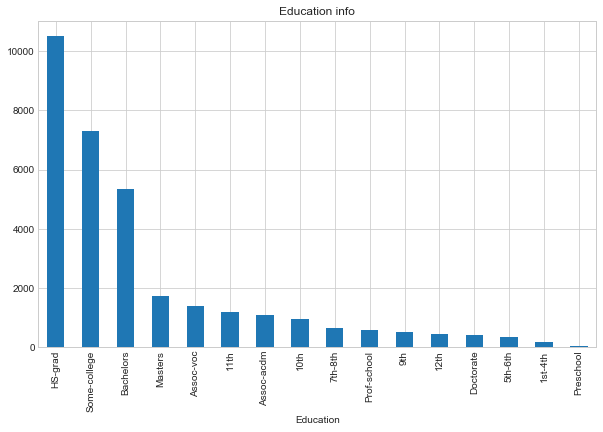

In [13]:
adult_df_rev['education'].value_counts().plot(kind='bar')
plt.title('Education info')                    
plt.xlabel('Education')

Text(0.5,0,'Marital status')

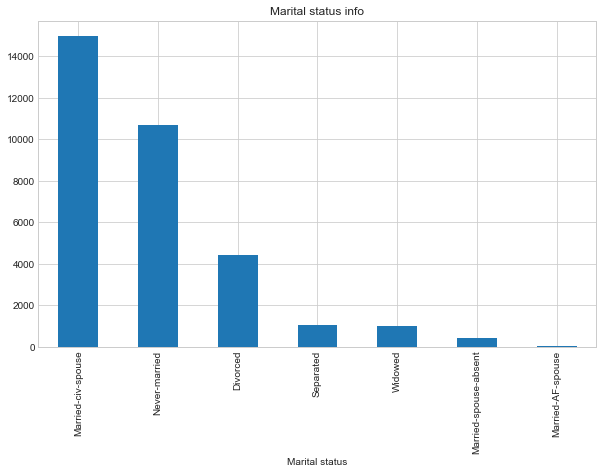

In [14]:
adult_df_rev['marital_status'].value_counts().plot(kind='bar')
plt.title('Marital status info')                    
plt.xlabel('Marital status')

Text(0.5,0,'Relationship')

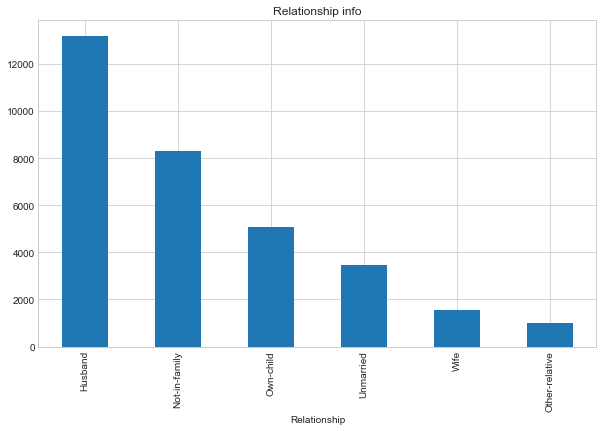

In [15]:
adult_df_rev['relationship'].value_counts().plot(kind='bar')
plt.title('Relationship info')                    
plt.xlabel('Relationship')

Text(0.5,0,'Sex')

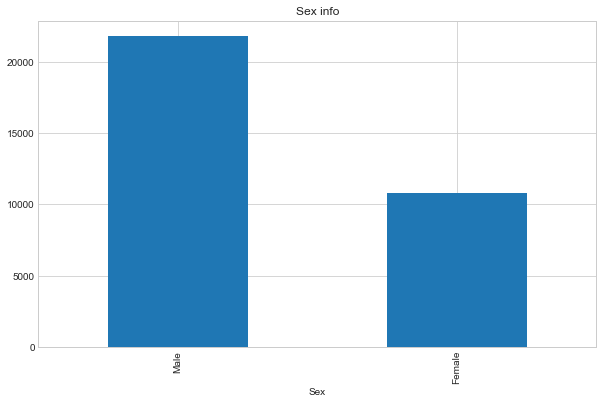

In [16]:
adult_df_rev['sex'].value_counts().plot(kind='bar')
plt.title('Sex info')                    
plt.xlabel('Sex')

Text(0.5,0,'Occupation')

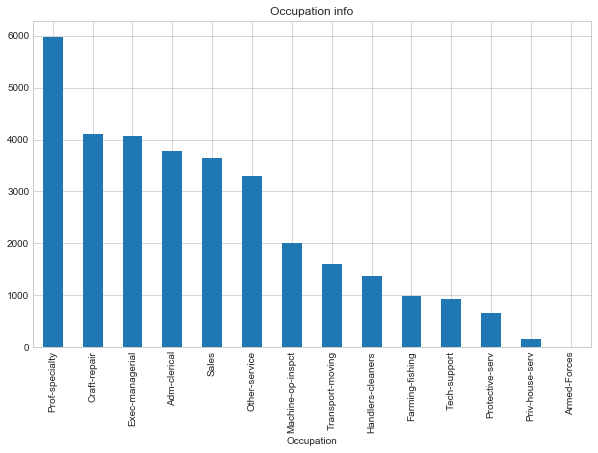

In [17]:
adult_df_rev['occupation'].value_counts().plot(kind='bar')
plt.title('Occupation info')                    
plt.xlabel('Occupation')

Text(0.5,0,'Race')

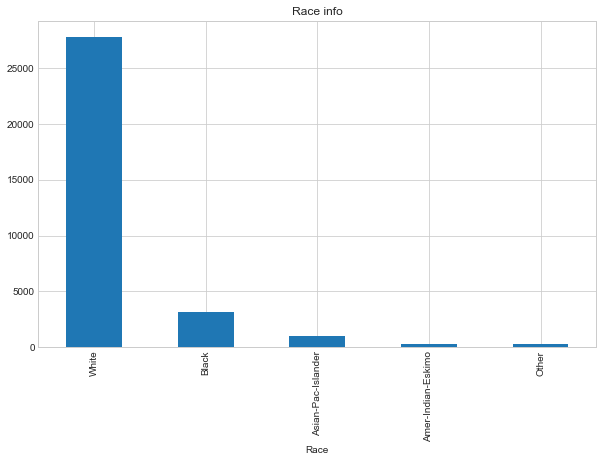

In [18]:
adult_df_rev['race'].value_counts().plot(kind='bar')
plt.title('Race info')                    
plt.xlabel('Race')

Text(0.5,0,'Hours')

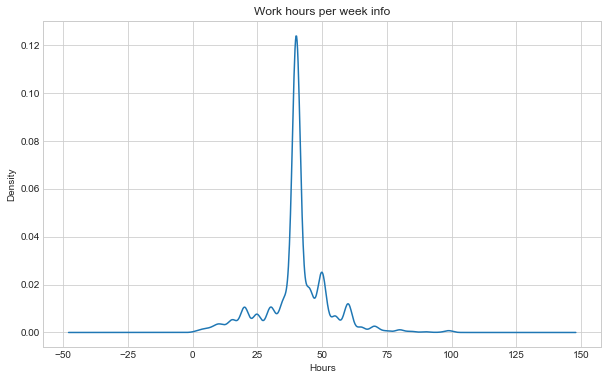

In [19]:
adult_df_rev['hours_per_week'].plot(kind='density')
plt.title('Work hours per week info')                    
plt.xlabel('Hours')

Text(0.5,0,'Income')

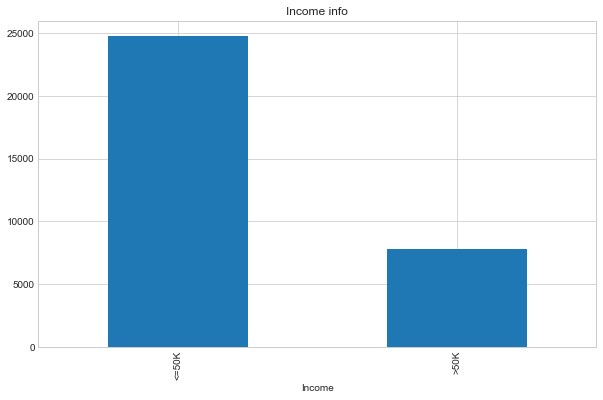

In [20]:
adult_df_rev['income'].value_counts().plot(kind='bar')
plt.title('Income info')                    
plt.xlabel('Income')

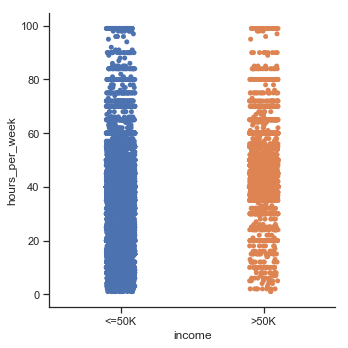

In [21]:
# Work hours & income
plt.rcParams['figure.figsize']=(10,10)
sns.set(style="ticks", color_codes=True)
sns.catplot(x="income", y="hours_per_week", data=adult_df_rev)

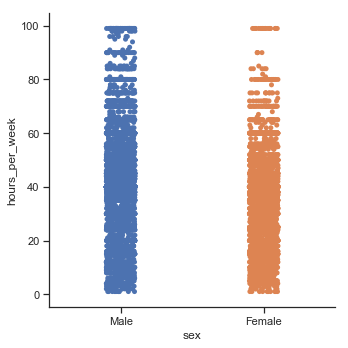

In [22]:
# Sex & work hours
sns.set(style="ticks", color_codes=True)
sns.catplot(x="sex", y="hours_per_week", data=adult_df_rev)

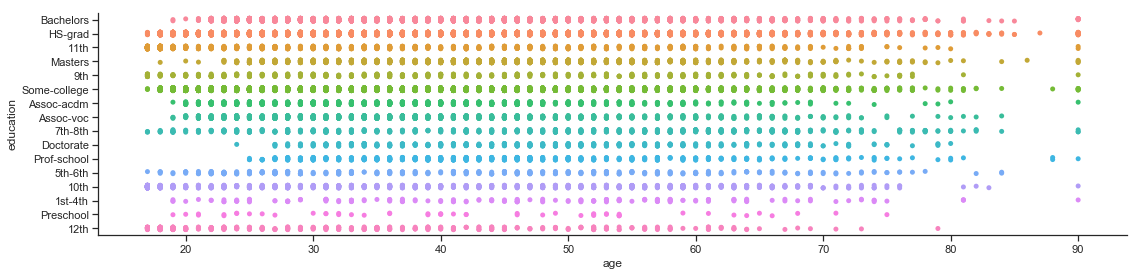

In [23]:
# Age & education
sns.set(style="ticks", color_codes=True)
sns.catplot(x="age", y="education", height=4, aspect=4, data=adult_df_rev)

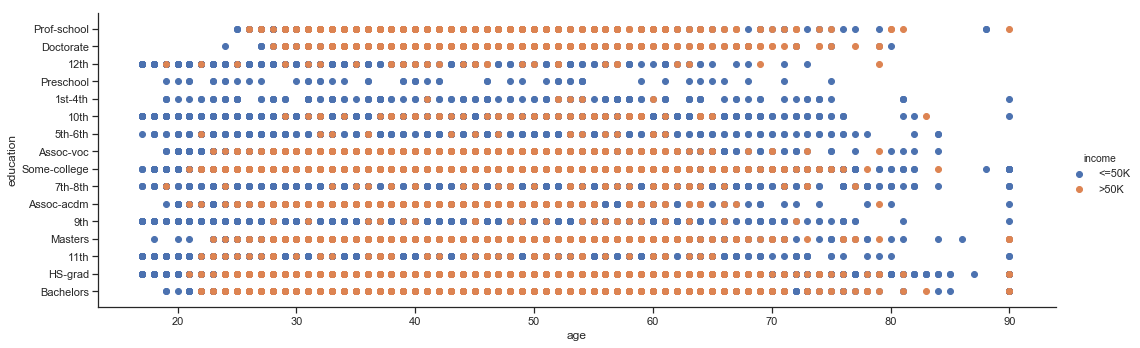

In [24]:
# Education & age
sns.FacetGrid(adult_df_rev, hue="income", height=5, aspect=3).map(plt.scatter, "age", "education").add_legend()
plt.show()

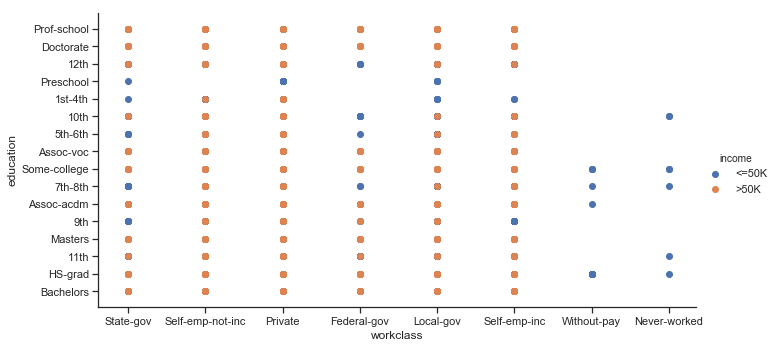

In [25]:
# Work hours & occupation
sns.FacetGrid(adult_df_rev, hue="income", height=5, aspect=2).map(plt.scatter, "workclass", "education").add_legend()
plt.show()

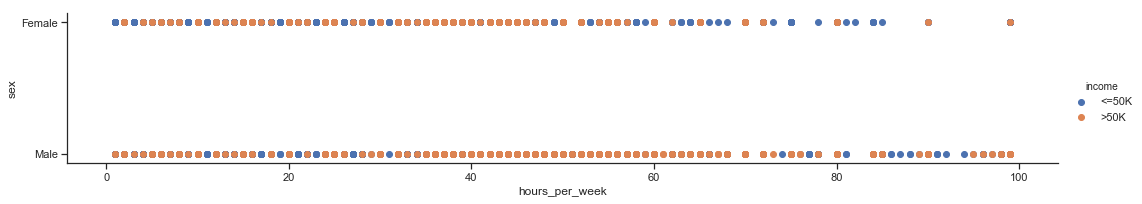

In [26]:
# Sex & work hours
sns.FacetGrid(adult_df_rev, hue="income", height=3, aspect=5).map(plt.scatter, "hours_per_week", "sex").add_legend()
plt.show()

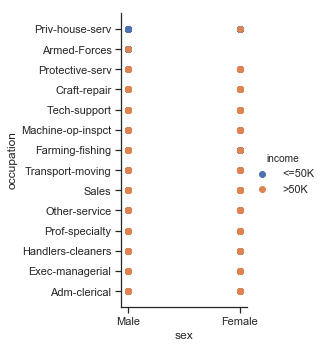

In [27]:
# Sex & occupation
sns.FacetGrid(adult_df_rev, hue="income", height=5, aspect=0.8).map(plt.scatter, "sex", "occupation").add_legend()
plt.show()

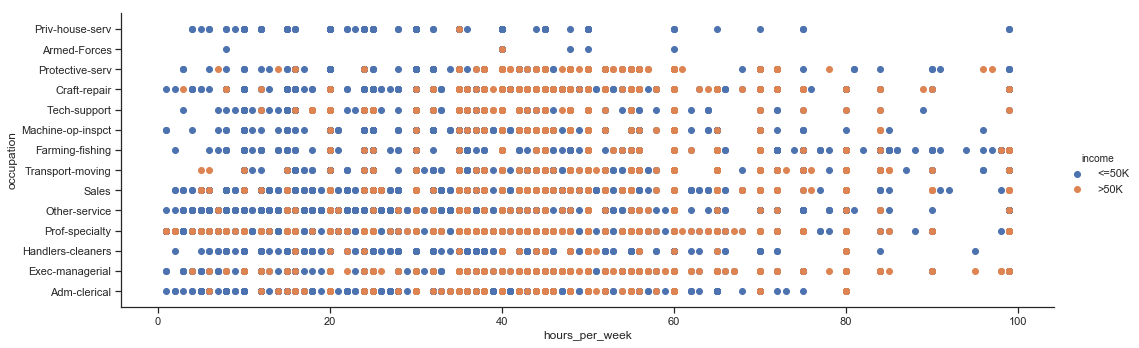

In [28]:
# Work hours & occupation
sns.FacetGrid(adult_df_rev, hue="income", height=5, aspect=3).map(plt.scatter, "hours_per_week", "occupation").add_legend()
plt.show()

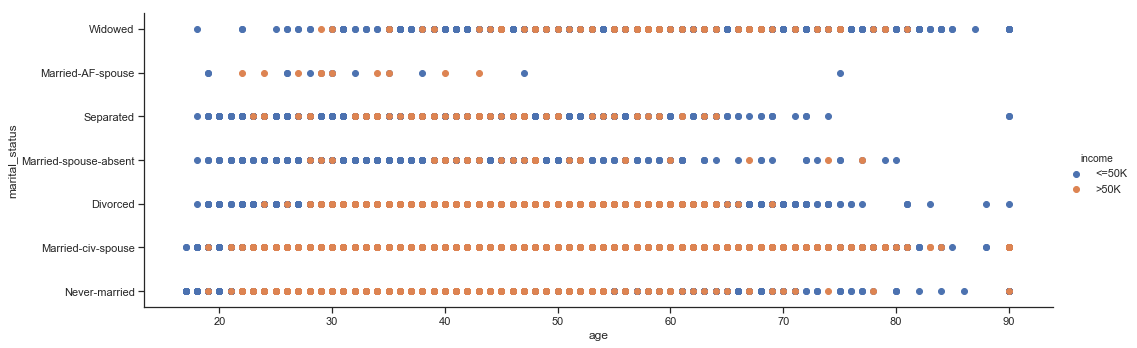

In [29]:
# Age & marital status
sns.FacetGrid(adult_df_rev, hue="income", height=5, aspect=3).map(plt.scatter, "age", "marital_status").add_legend()
plt.show()

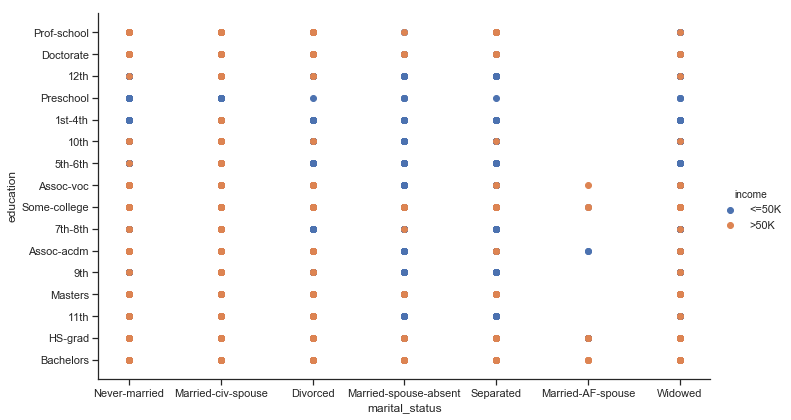

In [30]:
# Age & marital status
sns.FacetGrid(adult_df_rev, hue="income", height=6, aspect=1.7).map(plt.scatter, "marital_status", "education").add_legend()
plt.show()

In [31]:
le = preprocessing.LabelEncoder()
workclass_category = le.fit_transform(adult_df.workclass)
education_category = le.fit_transform(adult_df.education)
marital_category   = le.fit_transform(adult_df.marital_status)
occupation_category = le.fit_transform(adult_df.occupation)
relationship_category = le.fit_transform(adult_df.relationship)
race_category = le.fit_transform(adult_df.race)
sex_category = le.fit_transform(adult_df.sex)
native_country_category = le.fit_transform(adult_df.native_country)

In [32]:
#initialize the encoded categorical columns
adult_df_rev['workclass_category'] = workclass_category
adult_df_rev['education_category'] = education_category
adult_df_rev['marital_category'] = marital_category
adult_df_rev['occupation_category'] = occupation_category
adult_df_rev['relationship_category'] = relationship_category
adult_df_rev['race_category'] = race_category
adult_df_rev['sex_category'] = sex_category
adult_df_rev['native_country_category'] = native_country_category

In [33]:
#drop the old categorical columns from dataframe
dummy_fields = ['workclass', 'education', 'marital_status', 
                  'occupation', 'relationship', 'race',
                  'sex', 'native_country']
adult_df_rev = adult_df_rev.drop(dummy_fields, axis = 1)

In [34]:
adult_df_rev = adult_df_rev.reindex(['age', 'workclass_category', 'fnlwgt', 'education_category',
                                    'education_num', 'marital_category', 'occupation_category',
                                    'relationship_category', 'race_category', 'sex_category', 'capital_gain',
                                    'capital_loss', 'hours_per_week', 'native_country_category', 
                                    'income'], axis= 1)

adult_df_rev.head()

,age,workclass_category,fnlwgt,education_category,education_num,marital_category,occupation_category,relationship_category,race_category,sex_category,capital_gain,capital_loss,hours_per_week,native_country_category,income
0,39,6,77516,9,13,4,0,1,4,1,2174,0,40,38,<=50K
1,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,<=50K
2,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,<=50K
3,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,<=50K
4,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,<=50K


In [35]:
num_features = ['age', 'workclass_category', 'fnlwgt', 'education_category', 'education_num',
                'marital_category', 'occupation_category', 'relationship_category', 'race_category',
                'sex_category', 'capital_gain', 'capital_loss', 'hours_per_week',
                'native_country_category']

scaled_features = {}
for each in num_features:
    mean, std = adult_df_rev[each].mean(), adult_df_rev[each].std()
    scaled_features[each] = [mean, std]
    adult_df_rev.loc[:, each] = (adult_df_rev[each] - mean)/std

In [36]:
seed = 27
test_size = 0.5

In [37]:
features = adult_df_rev.values[:,:14]
target = adult_df_rev.values[:,14]
features_train, features_test, target_train, target_test = train_test_split(features,
                                                                            target, test_size = test_size, random_state = seed)

In [38]:
gnb = GaussianNB()
gnb.fit(features_train, target_train)
target_pred = gnb.predict(features_test)

In [39]:
accuracy_score(target_test, target_pred, normalize = True)

0.8061544131195872

In [40]:
svc = SVC(gamma='scale')
svc.fit(features_train, target_train)
target_pred = svc.predict(features_test)

In [41]:
accuracy_score(target_test, target_pred, normalize= True)

0.8493335790184878

In [42]:
seed = 27
test_size = 0.4

In [43]:
%rerun 37 38 39

=== Executing: ===
features = adult_df_rev.values[:,:14]
target = adult_df_rev.values[:,14]
features_train, features_test, target_train, target_test = train_test_split(features,
                                                                            target, test_size = test_size, random_state = seed)
gnb = GaussianNB()
gnb.fit(features_train, target_train)
target_pred = gnb.predict(features_test)
accuracy_score(target_test, target_pred, normalize = True)
=== Output: ===


0.8069865642994242

In [44]:
%rerun 40 41

=== Executing: ===
svc = SVC(gamma='scale')
svc.fit(features_train, target_train)
target_pred = svc.predict(features_test)
accuracy_score(target_test, target_pred, normalize= True)
=== Output: ===


0.847447216890595

In [45]:
seed = 27
test_size = 0.2

In [46]:
%rerun 37 38 39

=== Executing: ===
features = adult_df_rev.values[:,:14]
target = adult_df_rev.values[:,14]
features_train, features_test, target_train, target_test = train_test_split(features,
                                                                            target, test_size = test_size, random_state = seed)
gnb = GaussianNB()
gnb.fit(features_train, target_train)
target_pred = gnb.predict(features_test)
accuracy_score(target_test, target_pred, normalize = True)
=== Output: ===


0.8114540150468295

In [47]:
%rerun 40 41

=== Executing: ===
svc = SVC(gamma='scale')
svc.fit(features_train, target_train)
target_pred = svc.predict(features_test)
accuracy_score(target_test, target_pred, normalize= True)
=== Output: ===


0.8498387839705205